In [1]:
# This is a notebook to run a simple binary classification algorithm, using Decision Trees.

# Author: Viviana Acquaviva
# License: BSD but really should be TBD - just be nice.

import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

# Notes: 

# Data come from here
#from astroML.datasets import fetch_rrlyrae_combined
#X, y = fetch_rrlyrae_combined()

# As I was browsing around, I found some useful examples here:
# https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [2]:
# Read in the data in a data frame, and take a look at them
Train = pd.read_csv('RRLTrainSet.csv', index_col = 0)
Test = pd.read_csv('RRLTestSet.csv', index_col = 0)

In [3]:
# Print out the training data
#print(Train)
#print()
#print(Train.head())
Train
#Train.head()

,g-r,r-i,i-z,u-g,label
0,1.072,0.114,0.127,0.393,0
1,0.995,-0.009,-0.035,0.077,1
2,1.131,0.037,-0.018,0.154,1
3,1.046,0.039,0.019,0.118,1
4,0.880,0.150,0.035,0.321,0
5,1.030,0.178,0.109,0.385,0
6,0.877,0.141,0.050,0.355,0
7,0.877,0.091,0.131,0.250,0
8,1.086,0.033,-0.020,0.153,0
9,0.979,0.153,0.059,0.383,0


In [4]:
# Print out the testing data
Test

,g-r,r-i,i-z,u-g,label
0,1.004,0.140,-0.005,0.376,0
1,0.918,0.137,0.050,0.338,0
2,1.105,-0.004,-0.014,0.055,1
3,1.037,0.137,0.027,0.362,0
4,0.881,0.084,0.073,0.278,0
5,1.044,0.089,0.006,0.297,0
6,0.938,0.118,0.024,0.261,0
7,0.967,0.180,0.130,0.390,0


In [5]:
# Remove the 'label' from the test data, which is what we are trying to predict
Test.drop(['label'],axis = 1)

,g-r,r-i,i-z,u-g
0,1.004,0.140,-0.005,0.376
1,0.918,0.137,0.050,0.338
2,1.105,-0.004,-0.014,0.055
3,1.037,0.137,0.027,0.362
4,0.881,0.084,0.073,0.278
5,1.044,0.089,0.006,0.297
6,0.938,0.118,0.024,0.261
7,0.967,0.180,0.130,0.390


In [6]:
# This builds the four arrays (features/labels x train/test) needed by all sklearn ML models

# Build the training data. X are features Y are labels
X_train = Train.drop(['label'], axis=1)
Y_train = Train['label']

# Do the same for the test data
X_test = Test.drop(['label'], axis=1)
Y_test = Test['label']

# Check the type
print('Types:', type(X_train))

Types: <class 'pandas.core.frame.DataFrame'>


### First model alert!

This is how we build a model in sklearn. For reproducibility purposes, we will fix the random seed in the Decision Tree. But what is randomized in Decision Trees?


From the docs: The features are always randomly permuted at each split. 
Therefore, the best found split may vary, even with the same training data 
and max_features=n_features, if the improvement of the criterion is identical 
for several splits enumerated during the search of the best split. 
To obtain a deterministic behaviour during fitting, random_state has to be fixed.

In [7]:
# Setup the model 
random_seed = 5 # Some of the below assumes that 5 was used as the seed
model = DecisionTreeClassifier(random_state=random_seed)

In [8]:
# Print the properties of the model
print(model)

DecisionTreeClassifier(random_state=5)


You might recognize a few familiar attributes up there.

And this is how we fit a model! Fitting a model means that we build the architecture to make decisions.

In [9]:
# Fit the model! (This does the actual parameter optimisation)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=5)

At this point, the model has built a set of questions (splits) that would inform the classification.

This bit below is to visualize the tree.

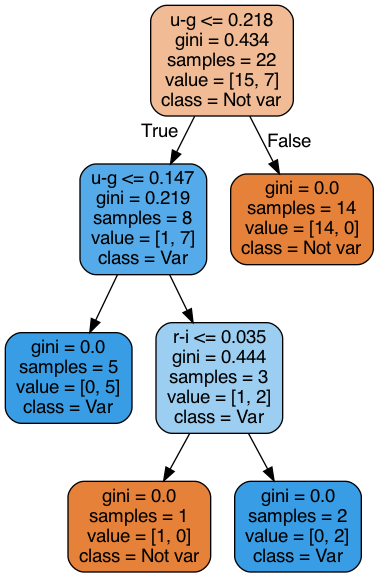

In [10]:
# Visualise the decision tree
dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = list(X_train.columns),
            class_names = ['Not var','Var'],
            filled = True,
            rounded = True
            )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

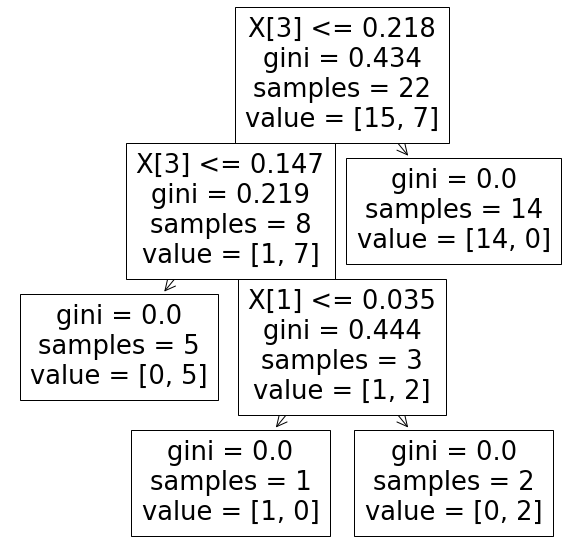

In [11]:
# In case the above GraphViz does not work
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(model);
plt.show()

Questions: 

1. What is the accuracy score (% of correct classifications) <b> on the training set </b>, based on the tree? 
    
2. How can we visualize it?

3. How can we figure out the accuracy <b> on the test set </b>?

In [12]:
# Fill

# 1. Based on the tree the accuracy score is 100% accuate

# 2. Training accuracy (will always be 100% if the decision tree goes 'deep' enough) 
train_accuracy = metrics.accuracy_score(Y_train, model.predict(X_train))
print('Training accuracy:', train_accuracy)

# 3. Testing accuracy
test_accuaracy = metrics.accuracy_score(Y_test, model.predict(X_test))
print('Test accuracy:', test_accuaracy)

Training accuracy: 1.0
Test accuracy: 1.0


This cell below shows us the splits made by the decision tree above.

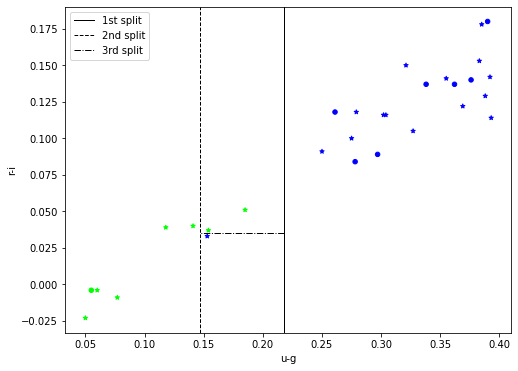

In [13]:
# Fill splits

# Feature to plot on x and y axis
xthing = 'u-g'
ything = 'r-i'

x1 = 0.218
x2 = 0.147
y3 = 0.035

# Plots training data
plt.figure(figsize=(8,6))

# Make the scatter plot
plt.scatter(X_train[xthing], X_train[ything],
            c=Y_train, 
            marker='*', 
            s=20, 
            label=None, 
            cmap='brg'
           )

# Manually (!?!) plot the splits in the decision tree
plt.axvline(x=x1, linewidth=1, color='black', ls='-',  label='1st split')
plt.axvline(x=x2, linewidth=1, color='black', ls='--', label='2nd split')
plt.hlines(y3, x1, x2, linewidth=1, color='black', linestyles='-.', label='3rd split')

# Plots test data
plt.scatter(X_test['u-g'], X_test['r-i'],
            c=Y_test, 
            marker='o',
            s=20,
            label=None, 
            cmap='brg'
           )

# Dressing for figure
plt.xlabel(xthing)
plt.ylabel(ything)
plt.legend();